## Experiment 2: Power-FDR Curves

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from fdrc.filters import build_filter
from fdrc.plots import plot_dataset
from fdrc.utils import load_experiment
from fdrc.artificial_data import make_gaussian_hypotheses
from fdrc.experiment2 import make_fdp_curve

def plot_sample(dataset, filter_name, filter_params):
    _, state = build_filter(filter_name, filter_params).step(dataset["p_values"])
    return plot_dataset(dataset, thresholds=state.threshold_history)


# Results directory:
EXPERIMENT_DIR = Path("../results/experiment2")
SAMPLES_DIR = Path("../samples/experiment2")

# Fixed Noise and Anomaly Ratio

In [2]:
parameters, datasets, results = load_experiment(SAMPLES_DIR / "default_sample")

### Sample with DecayLord

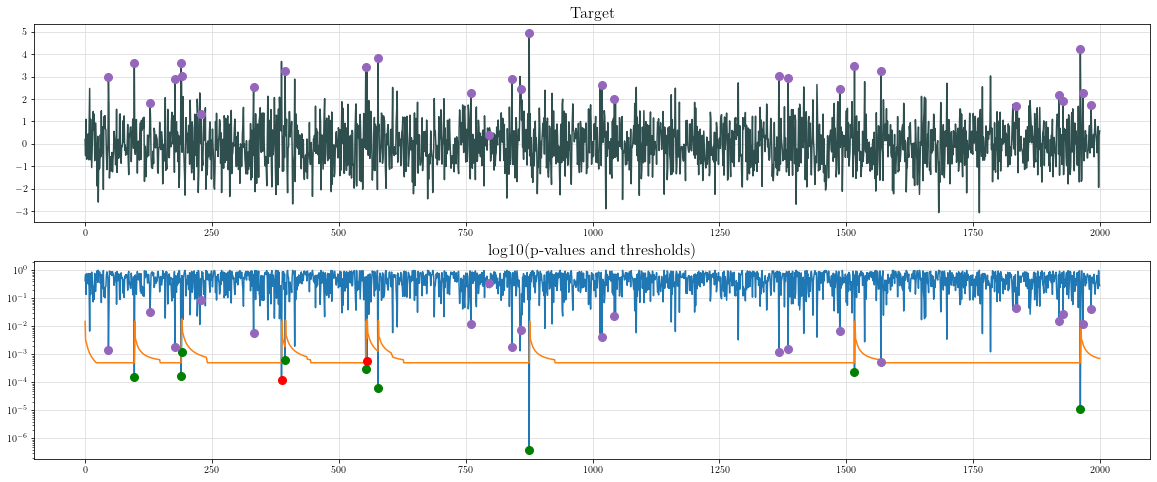

In [3]:
plot_sample(datasets[0], "DecayLORDFilter", dict(fdr_target=0.05, gamma_size=50, delta=0.99))

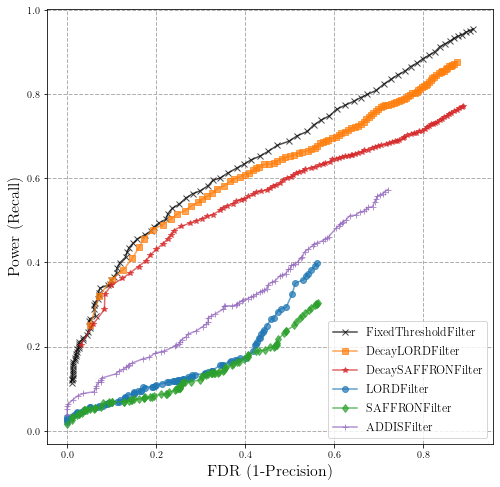

In [4]:
make_fdp_curve(results)

## Increasing Noise  + Fixed Anomaly Ratio

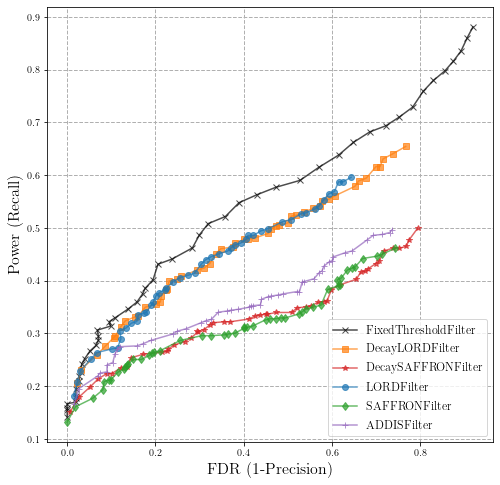

In [5]:
_, _, results = load_experiment(SAMPLES_DIR / "increasing_noise_sample")
make_fdp_curve(results)

## Fixed Noise + Increasing Anomaly Rate

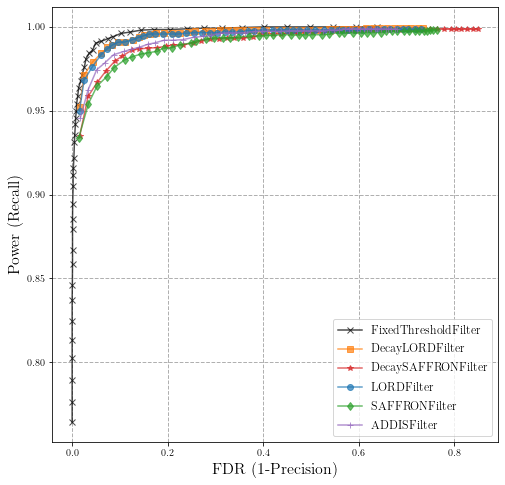

In [6]:
_, _, results = load_experiment(SAMPLES_DIR / "increasing_anomaly_sample")
make_fdp_curve(results)

## Increasing Signal Strength

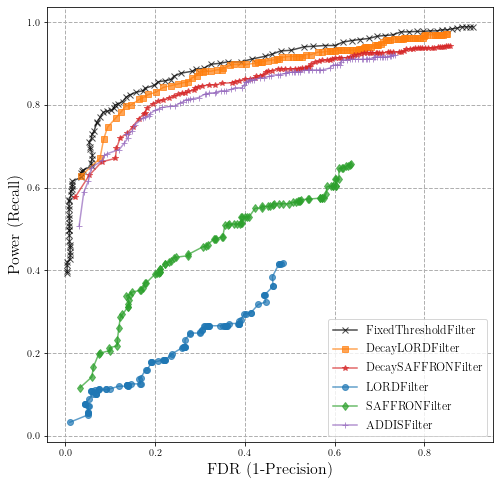

In [7]:
_, _, results = load_experiment(SAMPLES_DIR / "increasing_signal_strength_sample")
make_fdp_curve(results)

## Decreasing Signal Strength

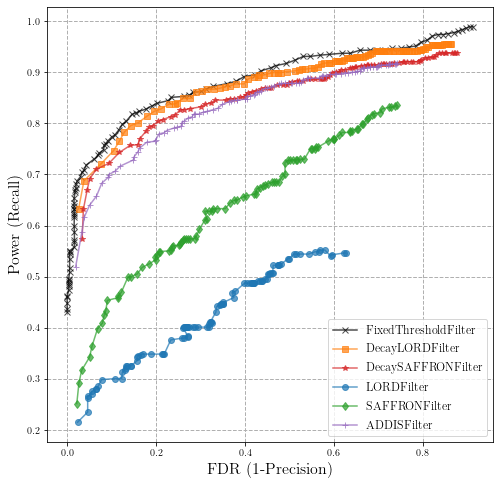

In [8]:
_, _, results = load_experiment(SAMPLES_DIR / "decreasing_signal_strength_sample")
make_fdp_curve(results)